# Project 2: Reproducibility in Natural Language Processing


### Read Data

In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [4]:
sou = pd.read_csv('data/SOTU.csv')
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


## Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)

This section is open ended and your chance to explare any advanced analysis. Please perform any additional analysis you find interesting! Suggested analyses (only do one max):

- Topic evolution over time - see https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization 
- Word frequency over time - does the frequency of certain words change over time
- Semantic similarity - investigate similarity within and between presidents or time periods. For example, similarity between one presidents speeches, e.g. are all of Biden's speeches similar to each other? How similar are they to Trump's speeches? Are speeches from the 2000s more similar to each other than speeches in the 1800s? Which two presidents have the most similar speeches? See https://spacy.io/usage/linguistic-features#vectors-similarity 
-  Named Entity Recognition - which entity types are most common in speeches? What are the most common words for each entity type - see https://spacy.io/usage/linguistic-features#named-entities 
- Classification - can you build a classifier to detect democratic versus republican state of the union speeches from 1980-2024 - see https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py 


In [10]:
import re

# data cleaning
sou["text_lower"] = sou["Text"].str.lower()

sou["Year"] = pd.to_numeric(sou["Year"], errors="coerce")
sou = sou.dropna(subset=["Year"])
sou["Year"] = sou["Year"].astype(int)

sou[["President", "Year", "Word Count"]].head()

,President,Year,Word Count
0,Joseph R. Biden,2024,8003
1,Joseph R. Biden,2023,8978
2,Joseph R. Biden,2022,7539
3,Joseph R. Biden,2021,7734
4,Donald J. Trump,2020,6169


In [13]:
# word trackers
target = [
    "america",
    "war",
    "economy",
    "freedom",
    "job",
    "terror",
    "climate",
]

target


['america', 'war', 'economy', 'freedom', 'job', 'terror', 'climate']

In [16]:
def count_word(text, word):
    pattern = r"\b" + re.escape(word.lower()) + r"\b"
    return len(re.findall(pattern, text))

for w in target_words:
    count_col = f"count_{w}"
    freq_col = f"freq_{w}_per_1000"
    
    sou[count_col] = sou["text_lower"].apply(lambda txt: count_word(txt, w))
    # normalized frequency
    sou[freq_col] = (sou[count_col] / sou["Word Count"]) * 1000

sou[[ "President", "Year"] + [f"freq_{w}_per_1000" for w in target_words]].head()

,President,Year,freq_america_per_1000,freq_war_per_1000,freq_economy_per_1000,freq_freedom_per_1000,freq_job_per_1000,freq_terror_per_1000,freq_climate_per_1000
0,Joseph R. Biden,2024,5.497938,0.999625,0.874672,1.749344,0.499813,0.000000,0.624766
1,Joseph R. Biden,2023,4.121185,0.445534,0.668300,0.111383,2.004901,0.000000,0.334150
2,Joseph R. Biden,2022,5.703674,0.795862,1.724367,0.928505,0.530574,0.132644,0.265287
3,Joseph R. Biden,2021,7.240755,1.034394,0.905094,0.000000,0.646496,0.000000,0.775795
4,Donald J. Trump,2020,6.159831,0.486302,0.810504,1.134706,0.810504,0.324202,0.000000


In [17]:
# by year
freq_cols = [f"freq_{w}_per_1000" for w in target_words]

yearly_freq = (
    sou.groupby("Year")[freq_cols]
    .mean()
    .reset_index()
    .sort_values("Year")
)

yearly_freq.head()

,Year,freq_america_per_1000,freq_war_per_1000,freq_economy_per_1000,freq_freedom_per_1000,freq_job_per_1000,freq_terror_per_1000,freq_climate_per_1000
0,1790,0.0,0.935454,0.935454,0.000000,0.0,0.0,0.0
1,1791,0.0,0.441696,0.000000,0.000000,0.0,0.0,0.0
2,1792,0.0,0.967586,0.000000,0.000000,0.0,0.0,0.0
3,1793,0.0,2.059732,0.514933,0.514933,0.0,0.0,0.0
4,1794,0.0,0.346500,0.346500,0.000000,0.0,0.0,0.0


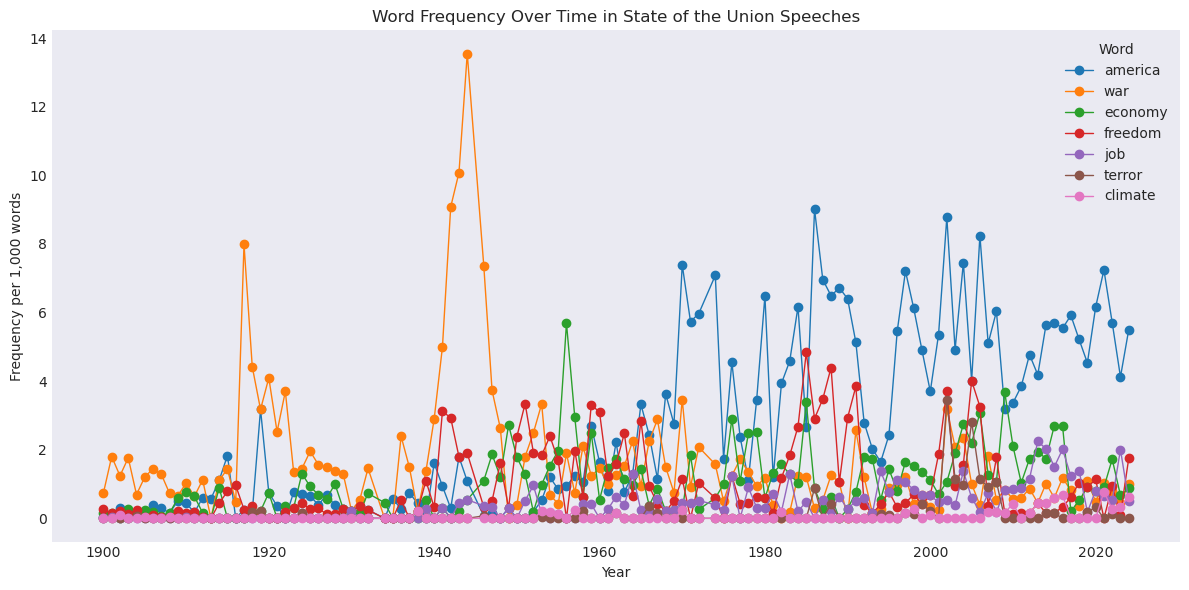

In [26]:
plt.figure(figsize=(12, 6))

#from 1900
year_min = 1900
yearly_modern = yearly_freq[yearly_freq["Year"] >= year_min]
yearly_modern.head()

for w in target_words:
    col = f"freq_{w}_per_1000"
    plt.plot(
        yearly_modern["Year"],
        yearly_modern[col],
        marker="o",
        label=w,
        linewidth=1,
    )

plt.xlabel("Year")
plt.ylabel("Frequency per 1,000 words")
plt.title("Word Frequency Over Time in State of the Union Speeches")
plt.legend(title="Word")
plt.tight_layout()

plt.savefig("word_frequency_multiline.png", dpi=300, bbox_inches="tight")

plt.show()

Mutiline plot:

From the plot above we can see historical patterns in the State of Union Speech. The word "war" showed spikes around the major conflicts in the U.S., including WWI, WWII and post 9/11 period. In contrast, the words "economy" and "job" showed a steady increasing trend throughout 1900-2020s, suggesting the economic concerns becoming increasingly central to presidential messaging.

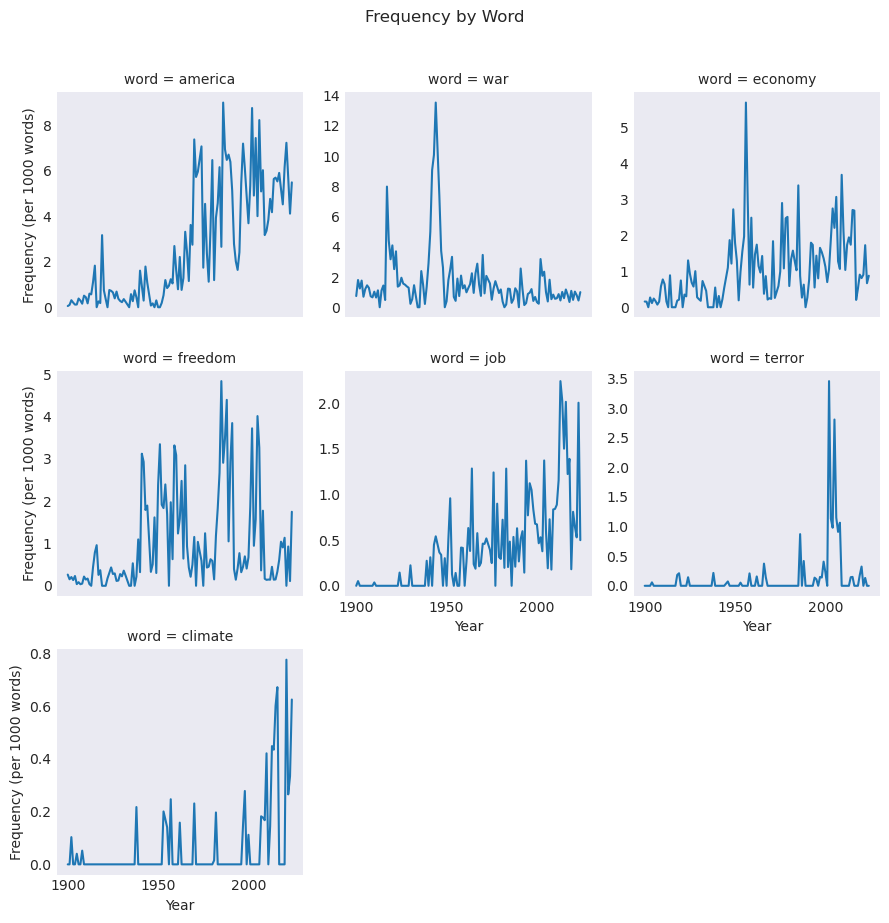

In [28]:
df_long = yearly_modern.melt(
    id_vars="Year",
    value_vars=freq_cols,
    var_name="word",
    value_name="freq_per_1000",
)

df_long["word"] = df_long["word"].str.replace("freq_", "", regex=False)
df_long["word"] = df_long["word"].str.replace("_per_1000", "", regex=False)

g = sns.relplot(
    data=df_long,
    x="Year",
    y="freq_per_1000",
    kind="line",
    hue=None,
    col="word",
    col_wrap=3,
    facet_kws={"sharey": False},
    height=3,
)

g.set_ylabels("Frequency (per 1000 words)")
g.set_xlabels("Year")
g.fig.suptitle("Frequency by Word", y=1.02)
plt.tight_layout()

plt.savefig("word_frequency.png", dpi=300, bbox_inches="tight")

plt.show()

Facet plot:

The plot above provides a clear view of each word's trajectory individually. The panel for “war” reveals sharp, isolated peaks that correspond to specific historical conflicts, while" economy” and “job” panels both show long-term upward trends, indicating that economic matters have grown in importance in presidential speeches. Their steady rise contrasts with the  
episodic behavior of “war,” highlighting the increasing centrality of domestic economic issues. The “climate” panel remains essentially flat until the late 1900s, followed by a clear emergence in the 21st century. Finally, the “america” and “freedom” panels reveal consistent but distinct patterns: “america” maintains a high baseline across all years,